<a href="https://colab.research.google.com/github/williamratcliff/APS-GDS-March-2024-Data-Science-Tutorial/blob/main/Classification/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
try:
    import google.colab
    COLAB = True
except ImportError:
    COLAB = False

if COLAB:
    print("You are in Google Colab!")
else:
    print("You are not in Google Colab.")



You are in Google Colab!


In [4]:
if COLAB:
  url="https://raw.githubusercontent.com/pbharrin/machinelearninginaction3x/master/Ch05/horseColicTest.txt"
  url2="https://raw.githubusercontent.com/pbharrin/machinelearninginaction3x/master/Ch05/horseColicTraining.txt"
  url3="https://raw.githubusercontent.com/pbharrin/machinelearninginaction3x/master/Ch05/testSet.txt"
#  dataset = pd.read_csv(url, header=0)
#else:
#  dataset = pd.read_csv("RandomForest_data.csv")

#
!wget $url -O horseColicTest.txt
!wget $url2 -O horseColicTraining.txt
!wget $url3 -O testSet.txt
!ls


--2024-03-03 18:06:31--  https://raw.githubusercontent.com/pbharrin/machinelearninginaction3x/master/Ch05/horseColicTest.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3722 (3.6K) [text/plain]
Saving to: ‘horseColicTest.txt’

horseColicTest.txt  100%[===================>]   3.63K  --.-KB/s    in 0s      

2024-03-03 18:06:31 (58.3 MB/s) - ‘horseColicTest.txt’ saved [3722/3722]

--2024-03-03 18:06:31--  https://raw.githubusercontent.com/pbharrin/machinelearninginaction3x/master/Ch05/horseColicTraining.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting 

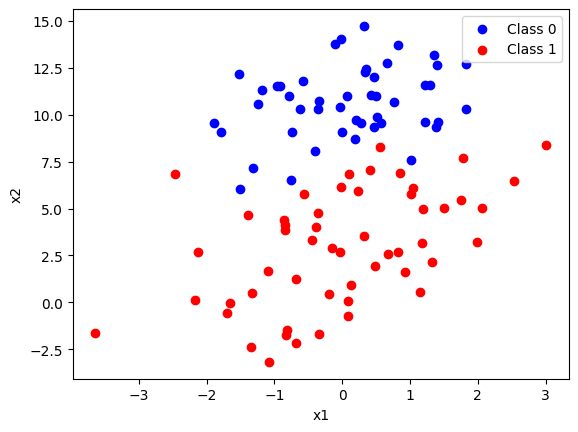

In [5]:
# prompt: plot testSet.txt.  The first column in the file is x1, the third is x2, the third is a label.  Color points with the label=0 as blue and those with the label =1 as red.  Make a legend showing the Label=0 as Class 0 and the label=1 as Class 1.  Make a legend showing red for Class 1 and blue for Class 2

import numpy as np
import matplotlib.pyplot as plt

# Load the data from the file
data = np.loadtxt('testSet.txt')

# Separate the data into x1, x2, and label
x1 = data[:, 0]
x2 = data[:, 1]
label = data[:, -1]

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the points with label=0 as blue and those with label=1 as red
ax.scatter(x1[label == 0], x2[label == 0], c='b', label='Class 0')
ax.scatter(x1[label == 1], x2[label == 1], c='r', label='Class 1')

# Add a legend
ax.legend()

# Add labels to the axes
ax.set_xlabel('x1')
ax.set_ylabel('x2')

# Show the plot
plt.show()


In [6]:
def sigmoid(inX):
    return 1.0 / (1 + np.exp(-inX))

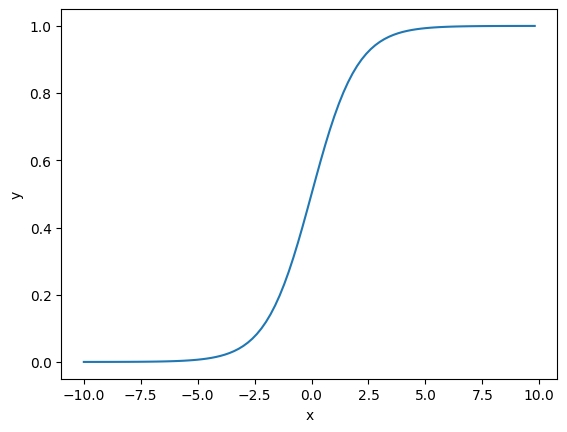

In [7]:
# prompt: plot the sigmoid function

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-10.0, 10.0, 0.2)
y = sigmoid(x)

plt.plot(x, y)
plt.ylabel('y')
plt.xlabel('x')
plt.show()


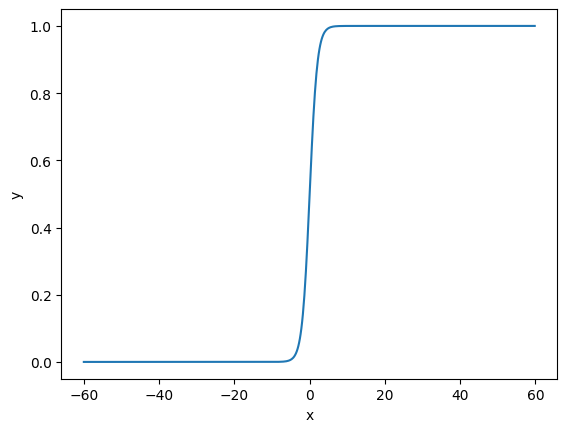

In [8]:
# prompt: plot the sigmoid function over an input range of -60 to 60

x = np.arange(-60.0, 60.0, 0.2)
y = sigmoid(x)

plt.plot(x, y)
plt.ylabel('y')
plt.xlabel('x')
plt.show()


In [9]:
def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat

In [10]:
def plotBestFit(weights):

    dataMat, labelMat = loadDataSet()
    dataArr = np.array(dataMat)
    n = np.shape(dataArr)[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i, 1]); ycord1.append(dataArr[i, 2])
        else:
            xcord2.append(dataArr[i, 1]); ycord2.append(dataArr[i, 2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2')
    plt.show()



In [11]:
def gradAscent(dataMatIn, classLabels):
    dataMatrix = np.mat(dataMatIn)             #convert to NumPy matrix
    labelMat = np.mat(classLabels).transpose() #convert to NumPy matrix
    m, n = np.shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    weights = np.ones((n, 1))
    for k in range(maxCycles):              #heavy on matrix operations
        h = sigmoid(dataMatrix*weights)     #matrix mult
        error = (labelMat - h)              #vector subtraction
        weights = weights + alpha * dataMatrix.transpose()* error #matrix mult
    return weights

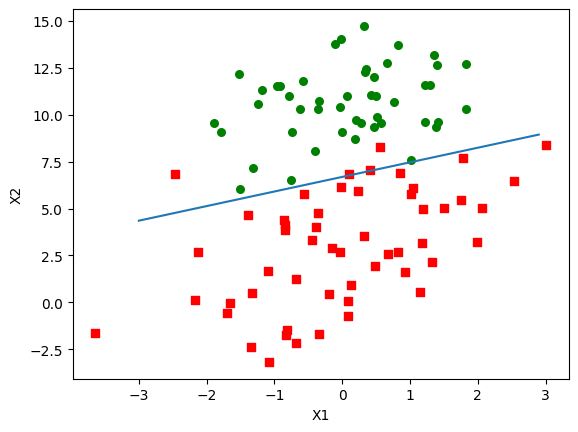

In [12]:
dataArr, labelMat = loadDataSet()
weights = gradAscent(dataArr, labelMat)
plotBestFit(weights.getA())

In [13]:
def stocGradAscent0(dataMatrix, classLabels):
    m, n = np.shape(dataMatrix)
    alpha = 0.01
    weights = np.ones(n)   #initialize to all ones
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i]*weights))
        error = classLabels[i] - h
        weights = weights + alpha * error * dataMatrix[i]
    return weights

def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m, n = np.shape(dataMatrix)
    weights = np.ones(n)   #initialize to all ones
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.0001    #apha decreases with iteration, does not
            randIndex = int(np.random.uniform(0, len(dataIndex)))#go to 0 because of the constant
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights



Now, explore Stochastic Gradient descent.  How does it do after one pass throught the data?  If you try the first method, plot how x0,x1, and x2 change as a a function of the number of iterations.


How is this improved by stochGradAscent1?

Using StochoGradAscent1 with 150 interations, see how it goes.

In [14]:
def classifyVector(inX, weights):
    prob = sigmoid(sum(inX*weights))
    if prob > 0.5: return 1.0
    else: return 0.0

In [15]:
def colicTest():
    frTrain = open('horseColicTraining.txt'); frTest = open('horseColicTest.txt')
    trainingSet = []; trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    trainWeights = stocGradAscent1(np.array(trainingSet), trainingLabels, 1000)
    errorCount = 0; numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(np.array(lineArr), trainWeights)) != int(currLine[21]):
            errorCount += 1
    errorRate = (float(errorCount)/numTestVec)
    print("the error rate of this test is: %f" % errorRate)
    return errorRate

In [16]:
def multiTest():
    numTests = 10; errorSum = 0.0
    for k in range(numTests):
        errorSum += colicTest()
    print("after %d iterations the average error rate is: %f" % (numTests, errorSum/float(numTests)))

In [17]:
colicTest()

<ipython-input-6-81d29b36c8e0>:2: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + np.exp(-inX))


the error rate of this test is: 0.283582


0.2835820895522388

In [18]:
multiTest()

<ipython-input-6-81d29b36c8e0>:2: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + np.exp(-inX))


the error rate of this test is: 0.313433
the error rate of this test is: 0.283582
the error rate of this test is: 0.268657
the error rate of this test is: 0.328358
the error rate of this test is: 0.328358
the error rate of this test is: 0.298507
the error rate of this test is: 0.402985
the error rate of this test is: 0.373134
the error rate of this test is: 0.283582
the error rate of this test is: 0.313433
after 10 iterations the average error rate is: 0.319403
